<a href="https://colab.research.google.com/github/zahraa-m/PHE_UK/blob/main/PHE_UK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_2020= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202004.csv')
df_2021= pd.read_csv('https://raw.githubusercontent.com/zahraa-m/PHE_UK/main/EPD_202104.csv')

df_2020['area_co'] = df_2020['POSTCODE'].str[0:3]
df_2021['area_co'] = df_2021['POSTCODE'].str[0:3]

df_2020.head(5)

,YEAR_MONTH,REGIONAL_OFFICE_NAME,REGIONAL_OFFICE_CODE,STP_NAME,STP_CODE,PCO_NAME,PCO_CODE,PRACTICE_NAME,PRACTICE_CODE,ADDRESS_1,ADDRESS_2,ADDRESS_3,ADDRESS_4,POSTCODE,BNF_CHEMICAL_SUBSTANCE,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,UNIDENTIFIED,area_co
0,202004,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,CONTINENCE SERVICE PROJECT,Y03414,NEWTON HEATH HEALTH CTR,2 OLD CHURCH STREET,MANCHESTER,NaN,M40 2JF,2102,Catheters,21020001196,SpeediCath Compact catheter male one size (12-...,21: Appliances,120.0,1,120.0,0.0,222.24,206.59020,False,M40
1,202004,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,CONTINENCE PRESCRIBING SERVICE,Y05022,WYTHENSHAWE OFFICES,1 STANCLIFFE ROAD,MANCHESTER,NaN,M22 4PJ,2114,Lubricant Gels,21140000013,OptiLube sterile lubricating jelly pre-filled ...,21: Appliances,22.0,3,66.0,0.0,5.88,5.46594,False,M22
2,202004,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,BROOKDALE SURGERY,P84062,NaN,NaN,NaN,NaN,NaN,90402000,Enteral nutrition,090402000BBSNA0,Osmolite 1.5kcal tube feed liquid,09: Nutrition and Blood,45000.0,1,45000.0,0.0,531.30,493.89907,False,NaN
3,202004,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,BROOKDALE SURGERY,P84062,NaN,NaN,NaN,NaN,NaN,0906026M0,Thiamine hydrochloride,0906026M0AAAFAF,Thiamine 50mg tablets,09: Nutrition and Blood,112.0,1,112.0,0.0,4.87,4.63946,False,NaN
4,202004,NORTH WEST,Y62,GREATER MANCHESTER HSC PARTNERSHIP STP,QOP,MANCHESTER CCG,14L00,CONTINENCE SERVICE PROJECT,Y03414,NEWTON HEATH HEALTH CTR,2 OLD CHURCH STREET,MANCHESTER,NaN,M40 2JF,2250,Leg Bags,22500505006,Uriplan sterile leg bag 30cm inlet tube 500ml,22: Incontinence Appliances,10.0,1,10.0,0.0,30.30,28.16632,False,M40


In [2]:
#calculate total quantity per medicine in each area in the Greater Manchester
TQ_per_med_2020 = pd.crosstab(index=df_2020['BNF_CHAPTER_PLUS_CODE'], columns=df_2020['area_co'], values=df_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
TQ_per_med_2021 = pd.crosstab(index=df_2021['BNF_CHAPTER_PLUS_CODE'], columns=df_2021['area_co'], values=df_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)

TQ_per_med_2020.to_csv("TQ_2020.csv")
TQ_per_med_2021.to_csv("TQ_2021.csv")


#calculate Cost per medicine in each area in the Greater Manchester
cost_per_med_2020 = pd.crosstab(index=df_2020['BNF_CHAPTER_PLUS_CODE'], columns=df_2020['area_co'], values=df_2020['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)
cost_per_med_2021 = pd.crosstab(index=df_2021['BNF_CHAPTER_PLUS_CODE'], columns=df_2021['area_co'], values=df_2021['ACTUAL_COST'], aggfunc='sum', margins=True).fillna(0).astype(int)

#Delete the "All" row in the table
TQ_per_med_2020 = TQ_per_med_2020.drop(["All"], axis=0)
TQ_per_med_2021 = TQ_per_med_2021.drop(["All"], axis=0)

cost_per_med_2020 = cost_per_med_2020.drop(["All"], axis=0)
cost_per_med_2021 = cost_per_med_2021.drop(["All"], axis=0)

#Rename the All column to TQ_2020 and TQ_2021
TQ_per_med_2020 = TQ_per_med_2020.rename(columns={"All": "TQ_2020"})
TQ_per_med_2021 = TQ_per_med_2021.rename(columns={"All": "TQ_2021"})

cost_per_med_2020 = cost_per_med_2020.rename(columns={"All": "cost_2020"})
cost_per_med_2021 = cost_per_med_2021.rename(columns={"All": "cost_2021"})

#filter the tables to include only medicine's type and total quantity
df1 = TQ_per_med_2020.filter(['BNF_CHAPTER_PLUS_CODE', 'TQ_2020'])
df2 = TQ_per_med_2021.filter(['BNF_CHAPTER_PLUS_CODE', 'TQ_2021'])

#filter the tables to include only medicine's type and Cost
df3 = cost_per_med_2020.filter(['BNF_CHAPTER_PLUS_CODE', 'cost_2020'])
df4 = cost_per_med_2021.filter(['BNF_CHAPTER_PLUS_CODE', 'cost_2021'])

#find the difference between Total quantity of 2020 and 2021
TQ_per_drug_allyear = pd.merge(df1, df2, how="outer", on=('BNF_CHAPTER_PLUS_CODE')).fillna(0).astype(int)
diff_TQ = (df2['TQ_2021'] - df1['TQ_2020'] )
TQ_per_drug_allyear['diff_TQ']=diff_TQ.fillna(0) 

#find the percentage of the difference
diff_TQ_pct = (diff_TQ / df1['TQ_2020']) * 100
TQ_per_drug_allyear['diff_TQ_pct']=diff_TQ_pct.fillna(0)

#Filter zero differance in total quantity
TQ_per_drug_allyear= TQ_per_drug_allyear.query("diff_TQ>0")


#find the difference between cost of medicine in 2020 and 2021
cost_per_drug_allyear = pd.merge(df3, df4, how="outer", on=('BNF_CHAPTER_PLUS_CODE')).fillna(0).astype(int)
diff_cost = (df4['cost_2021'] - df3['cost_2020'])
cost_per_drug_allyear['diff_cost']= diff_cost.fillna(0)

#find the percentage of the difference
diff_cost_pct = (diff_cost / df3['cost_2020']) * 100
cost_per_drug_allyear['diff_cost_pct']= diff_cost_pct.fillna(0)

#Filter zero differance in cost
cost_per_drug_allyear=cost_per_drug_allyear.query("diff_cost>0")

In [3]:
#plot the difference between Total quantity of medicine in 2021 and 2020
import plotly.express as px
fig_TQ = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ',
                  labels={
                     "x": "Type of medicines",
                     "diff_TQ": "Total Quantity difference"},
                 title='Total Quantity difference between 2021 & 2020')
fig_TQ.show()

#plot the percentage of difference between Total quantity of medicine in 2021 and 2020
fig_TQ_pct = px.line(TQ_per_drug_allyear, x=TQ_per_drug_allyear.index, y='diff_TQ_pct',
                  labels={
                     "x": "Type of Medicines",
                     "diff_TQ_pct": "Total Quantity Increase %"},
                 title='Percentage increase of Total Quantity difference between 2021 & 2020')
fig_TQ_pct.update_traces(line_color='#F54730')
fig_TQ_pct.show()


#plot the cost difference between the medicine of 2021 and 2020
fig_cost = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost',
                    labels={
                       "x": "Type of Medicines",
                       "diff_cost": "Cost difference"},
                   title='Cost difference between 2021 & 2020')
fig_cost.show()

#plot the percentage of cost difference between the medicine of 2021 and 2020
fig_cost_pct = px.line(cost_per_drug_allyear, x=cost_per_drug_allyear.index, y='diff_cost_pct',
                  labels={
                     "x": "Type of Medicines",
                     "diff_cost_pct": "Cost Increase %"},
                 title='Percentage increase of Cost difference between 2021 & 2020')
fig_cost_pct.update_traces(line_color='#F54730')
fig_cost_pct.show()

In [7]:
#filter per area_co, bnf_chapter_plus_code, total_quantity, actual_cost
a_2020 = df_2020.loc[:,["area_co", "BNF_CHAPTER_PLUS_CODE", "TOTAL_QUANTITY", "ACTUAL_COST"]]
a_2021 = df_2021.loc[:,["area_co", "BNF_CHAPTER_PLUS_CODE", "TOTAL_QUANTITY", "ACTUAL_COST"]]

#print(a_2020.head(4))
#print(a_2020.shape)

quantity_per_area_2020 = a_2020.groupby('area_co')['TOTAL_QUANTITY'].mean()
quantity_per_area_2021 = a_2021.groupby('area_co')['TOTAL_QUANTITY'].mean()


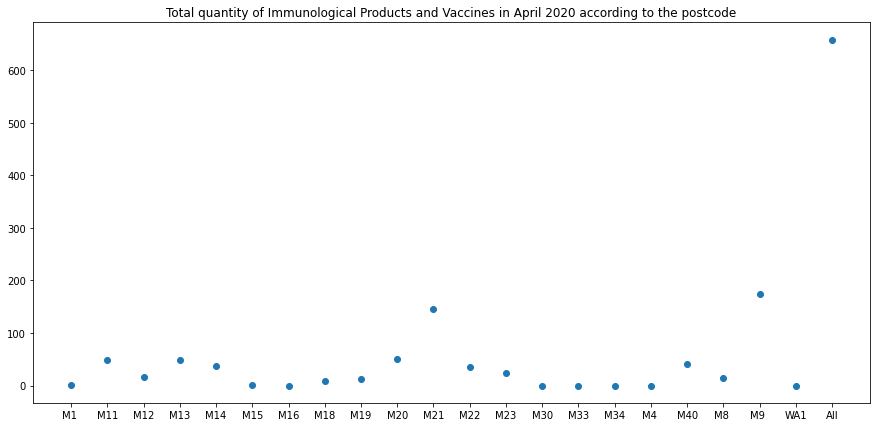

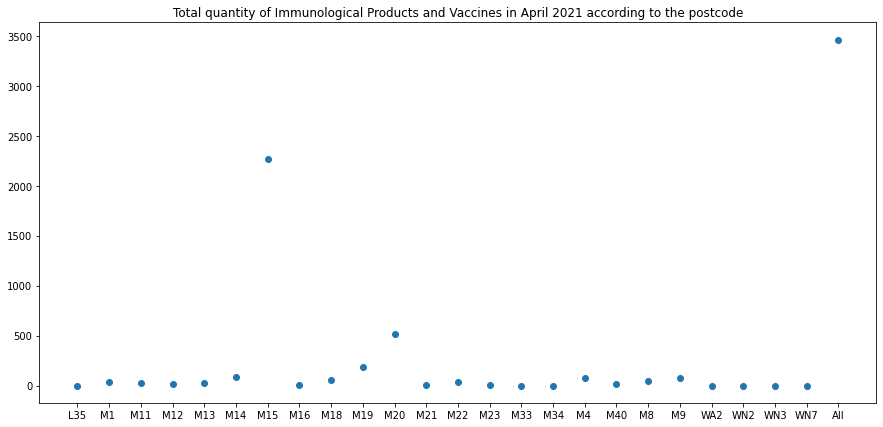

In [37]:
TQ3_per_med_2020 = pd.crosstab(index=a_2020['area_co'], columns=a_2020['BNF_CHAPTER_PLUS_CODE'], values=a_2020['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
TQ4_per_med_2020 = TQ3_per_med_2020.reset_index()
TQ4_per_med_2020 = TQ4_per_med_2020.drop("All", axis = 1)
#print(TQ4_per_med_2020.head(2))

TQ3_per_med_2021 = pd.crosstab(index=a_2021['area_co'], columns=a_2021['BNF_CHAPTER_PLUS_CODE'], values=a_2021['TOTAL_QUANTITY'], aggfunc='sum', margins=True).fillna(0).astype(int)
#print(TQ3_per_med_2020)
TQ4_per_med_2021 = TQ3_per_med_2021.reset_index()
TQ4_per_med_2021 = TQ4_per_med_2021.drop("All", axis = 1)
#print(TQ4_per_med_2021.info)


import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.scatter(TQ4_per_med_2020['area_co'], TQ4_per_med_2020['14: Immunological Products and Vaccines'])
plt.title("Total quantity of Immunological Products and Vaccines in April 2020 according to the postcode")
#plt.yticks([0, 100, 500, 1000, 1500, 2000, 2500, 3000, 3500])
plt.show()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.scatter(TQ4_per_med_2021['area_co'], TQ4_per_med_2021['14: Immunological Products and Vaccines'])
plt.title("Total quantity of Immunological Products and Vaccines in April 2021 according to the postcode")
plt.show()